# **Import Libraries**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [4]:
# Reading the Dataset

df =pd.read_csv('laptop_data.csv')
df.head()



,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df1= df.copy()

In [6]:
df.shape # rows and columns

(1303, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [8]:
# Check null counts
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
# Check duplicates

df.duplicated().sum()

0

In [10]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [12]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [13]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [14]:

df.Ram

0        8GB
1        8GB
2        8GB
3       16GB
4        8GB
        ... 
1298     4GB
1299    16GB
1300     2GB
1301     6GB
1302     4GB
Name: Ram, Length: 1303, dtype: object

In [15]:
# remove GB from RAM Column values

df['Ram'] = df['Ram'].str.replace('GB','')

In [16]:
df['Ram']

0        8
1        8
2        8
3       16
4        8
        ..
1298     4
1299    16
1300     2
1301     6
1302     4
Name: Ram, Length: 1303, dtype: object

In [17]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [18]:
df['Weight'] = df['Weight'].str.replace('kg','')

In [19]:
df['Weight']

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1298     1.8
1299     1.3
1300     1.5
1301    2.19
1302     2.2
Name: Weight, Length: 1303, dtype: object

In [20]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [21]:
df['Ram'].dtype

dtype('O')

In [22]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [23]:
# Lets change data type of RAM : int32 and Weight : float32

df['Ram']= df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


<ipython-input-25-b5d5d86e67cc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


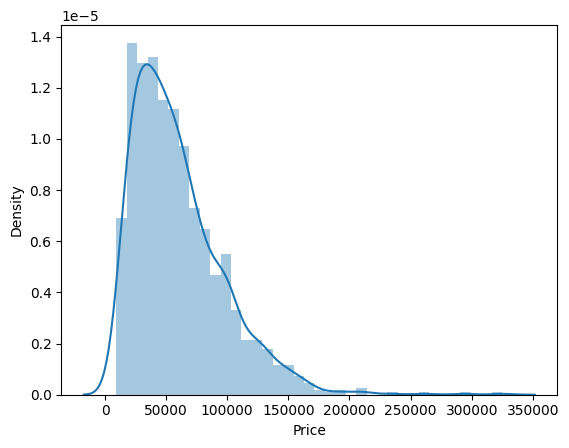

In [25]:
sns.distplot(df['Price'])
plt.show()

# It is Rightly Skewed

In [26]:
df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

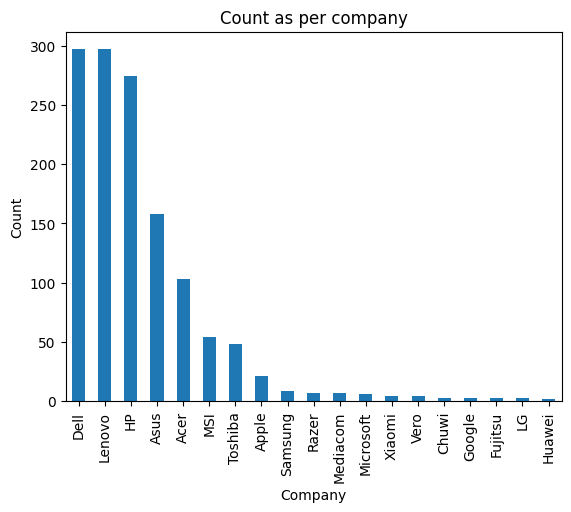

In [27]:
df['Company'].value_counts().plot(kind='bar')

plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Count as per company')
plt.show()

- We can observe 'Dell', 'Lenovo','HP' companies are having higher count

- According to the data people buy more laptops of Dell




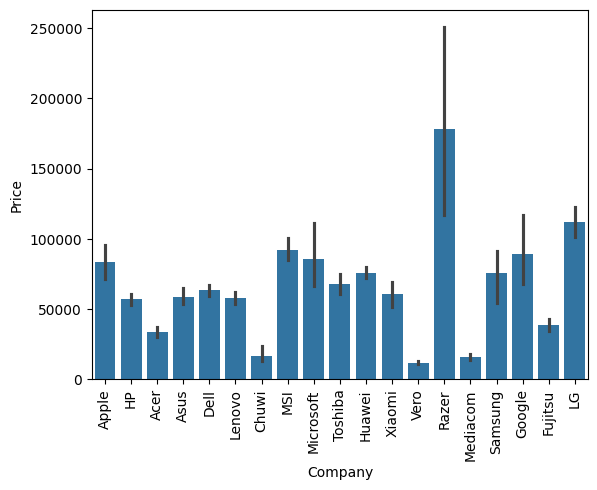

In [28]:
sns.barplot(x=df['Company'], y =df['Price'])
plt.xticks(rotation=90)
plt.show()

# As per the Data Razer's laptop are more costly.

In [29]:
df.loc[df['Company'] == 'Razer', 'Price']

196     324954.72
647     138474.72
778     154458.72
816      95850.72
830     292986.72
1117     54825.12
1231    186426.72
Name: Price, dtype: float64

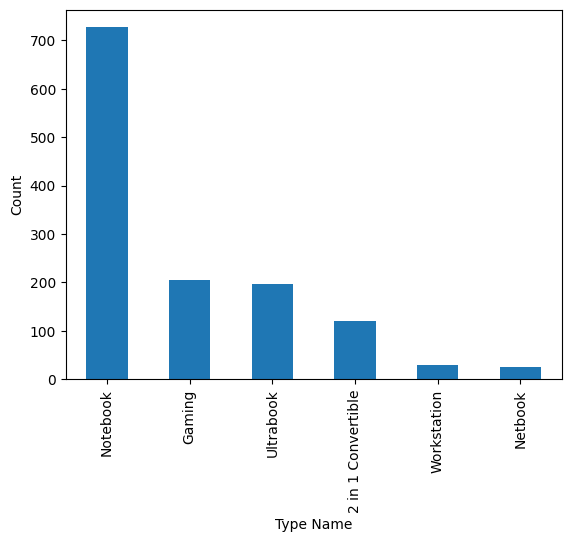

In [30]:
df['TypeName'].value_counts().plot(kind='bar')
plt.xlabel('Type Name')
plt.ylabel('Count')
plt.show()

According to the data People buy more notebook types laptop

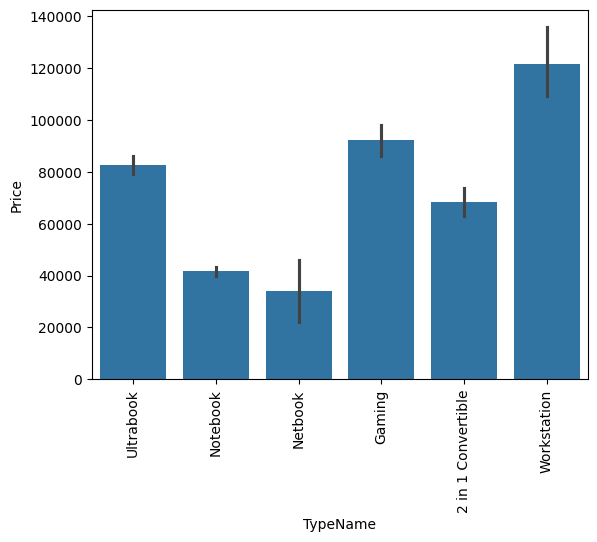

In [31]:
sns.barplot(x=df['TypeName'], y =df['Price'])

plt.xticks(rotation='vertical')
plt.show()

Accoring to the data Workstation is more costly compare to other laptop's type

<ipython-input-32-dff43b403089>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


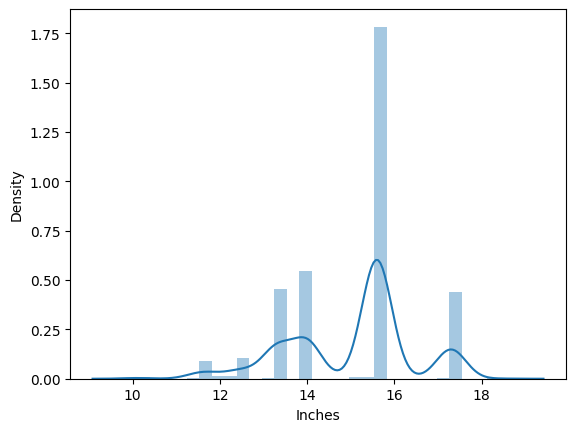

In [32]:
sns.distplot(df['Inches'])
plt.show()

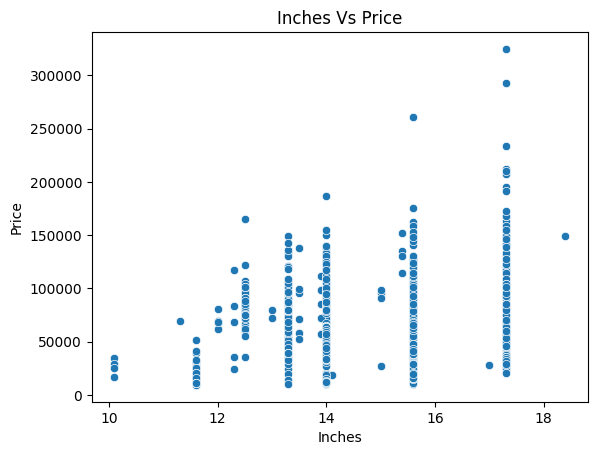

In [33]:
sns.scatterplot(x=df['Inches'], y= df['Price'])
plt.title('Inches Vs Price')
plt.show()

- We can see Inches and Price are propotional to each other

- As we see as a inches increase price also increase

In [34]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

# **Feature Engineering**


Feature engineering is the process of creating new features or modifying existing features in a dataset to improve the performance of machine learning models. It involves transforming raw data into a format that is more suitable for the predictive task at hand. Feature engineering is a critical step in the machine learning pipeline and can have a significant impact on the performance of models.

In [35]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

# Creating New Feature touch Screen

In [36]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [37]:
df['TouchScreen']

0       0
1       0
2       0
3       0
4       0
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: TouchScreen, Length: 1303, dtype: int64

In [38]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
558,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,AMD A10-Series A10-9620P 2.5GHz,6,128GB SSD,AMD Radeon 530,Windows 10,1.91,30310.992,0
892,Samsung,Ultrabook,15.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.17,90522.720,0
1252,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6100U 2.3GHz,6,128GB SSD,Nvidia GeForce 920MX,Windows 10,2.40,30316.320,0
1180,Lenovo,2 in 1 Convertible,14.0,IPS Panel Touchscreen 2560x1440,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.36,87219.360,1
404,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.80,119826.720,0
1001,HP,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.34,63349.920,0
981,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 7,1.20,63669.600,0
893,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.32,95850.720,0
1246,Dell,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.60,46620.000,0
68,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,1.90,29250.720,0


In [39]:
df['TouchScreen'].value_counts()

# 0 - not Touch Screen, 1 - Touch Screen

0    1111
1     192
Name: TouchScreen, dtype: int64

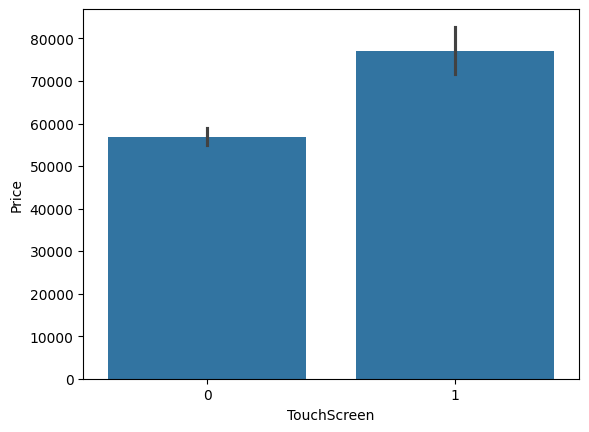

In [40]:
sns.barplot(x=df['TouchScreen'], y=df['Price'])
plt.show()

As Price has positive realtion with Touch Screen If laptop is touch screen it is more costly

# Creating New Column IPS Display

In [41]:
df['ScreenResolution']

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [42]:
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

# 1 - For IPS Display, 0 - Not IPS Display

In [43]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [44]:
df['IPS'].value_counts()

0    938
1    365
Name: IPS, dtype: int64

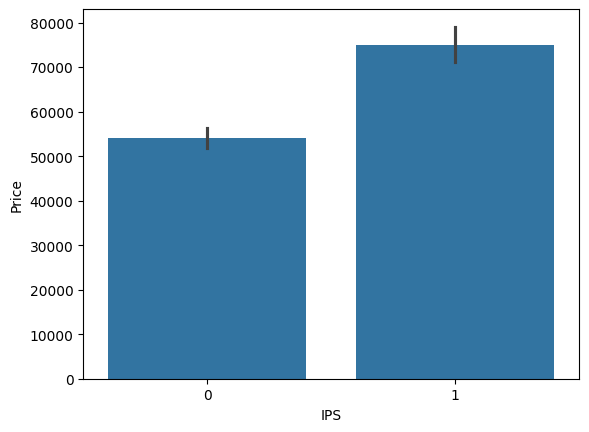

In [45]:
sns.barplot(x=df['IPS'], y=df['Price'])
plt.show()

As Price has positive realtion with IPS Display If laptop has IPS Display it is more costly

In [46]:
df['ScreenResolution']

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [47]:
new = df['ScreenResolution'].str.split('x', n=1, expand=True)

In [48]:
new

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [49]:
df['X_res'] = new[0]
df['Y_res'] =new[1]

In [50]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [51]:
df['X_res']

0               IPS Panel Retina Display 2560
1                                        1440
2                                Full HD 1920
3               IPS Panel Retina Display 2880
4               IPS Panel Retina Display 2560
                        ...                  
1298     IPS Panel Full HD / Touchscreen 1920
1299    IPS Panel Quad HD+ / Touchscreen 3200
1300                                     1366
1301                                     1366
1302                                     1366
Name: X_res, Length: 1303, dtype: object

In [52]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [53]:
df['X_res']

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: X_res, Length: 1303, dtype: object

In [54]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [56]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [57]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [58]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [59]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2 ))**0.5/ df['Inches']).astype('float')
# Price per inch

In [60]:
df['ppi']

0       226.983005
1       127.677940
2       141.211998
3       220.534624
4       226.983005
           ...    
1298    157.350512
1299    276.053530
1300    111.935204
1301    100.454670
1302    100.454670
Name: ppi, Length: 1303, dtype: float64

In [61]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [62]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [63]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys',
       'Weight', 'Price', 'TouchScreen', 'IPS', 'X_res', 'Y_res', 'ppi'],
      dtype='object')

In [64]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [65]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys',
       'Weight', 'Price', 'TouchScreen', 'IPS', 'X_res', 'Y_res', 'ppi'],
      dtype='object')

In [66]:
df.drop(columns=['Inches','X_res', 'Y_res'], inplace = True)

In [67]:
df.columns

Index(['Company', 'TypeName', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price', 'TouchScreen', 'IPS', 'ppi'],
      dtype='object')

In [68]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [69]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [70]:
df['Cpu Name'] = df['Cpu'].apply(lambda x: ' '.join(x.split()[0:3]))

In [71]:
df['Cpu Name']

0            Intel Core i5
1            Intel Core i5
2            Intel Core i5
3            Intel Core i7
4            Intel Core i5
               ...        
1298         Intel Core i7
1299         Intel Core i7
1300    Intel Celeron Dual
1301         Intel Core i7
1302    Intel Celeron Dual
Name: Cpu Name, Length: 1303, dtype: object

In [72]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [73]:
df['Cpu Name'].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

In [74]:
def fetch_processor(text):
  if text == 'Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
    return text

  else:
    if text.split()[0]=='Intel':
      return 'Other Intel Processor'

    else:
      return 'AMD Processor'

In [75]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [76]:
df['Cpu brand'].value_counts()

Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: Cpu brand, dtype: int64

In [77]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: >

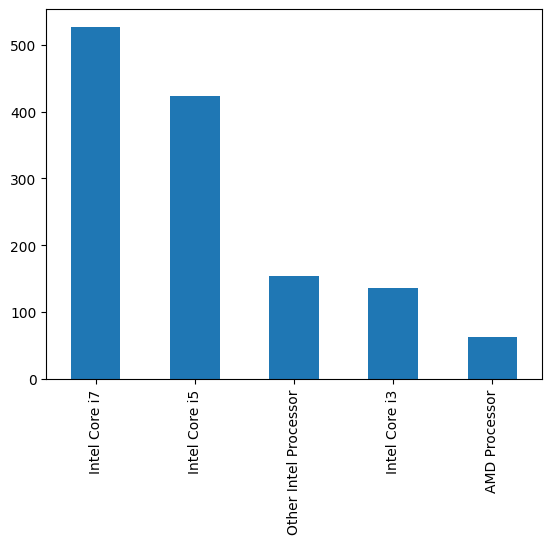

In [78]:
df['Cpu brand'].value_counts().plot(kind='bar')

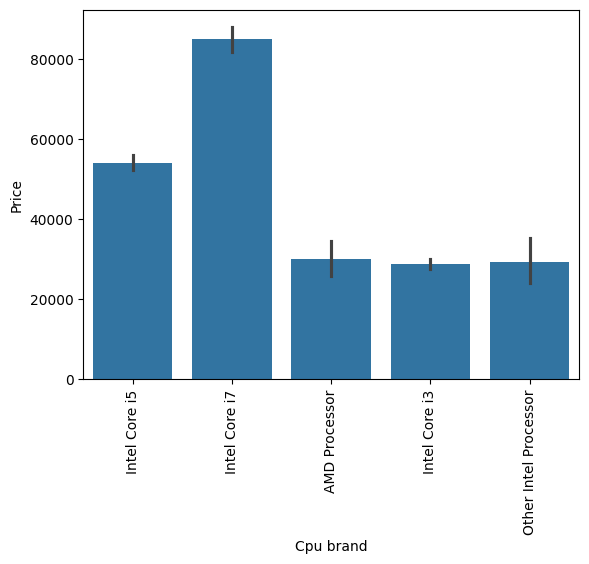

In [79]:
sns.barplot(x=df['Cpu brand'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [80]:
df.drop(columns=['Cpu','Cpu Name'], inplace=True)

In [81]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: >

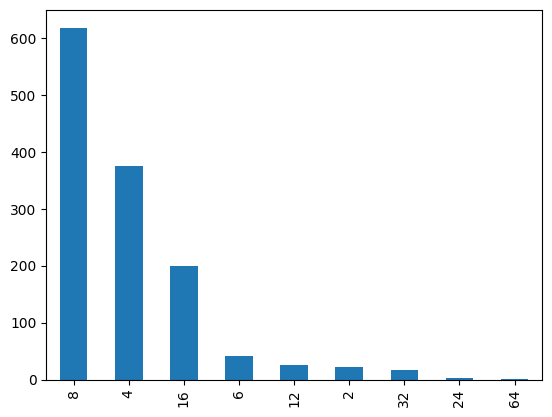

In [82]:
df['Ram'].value_counts().plot(kind='bar')

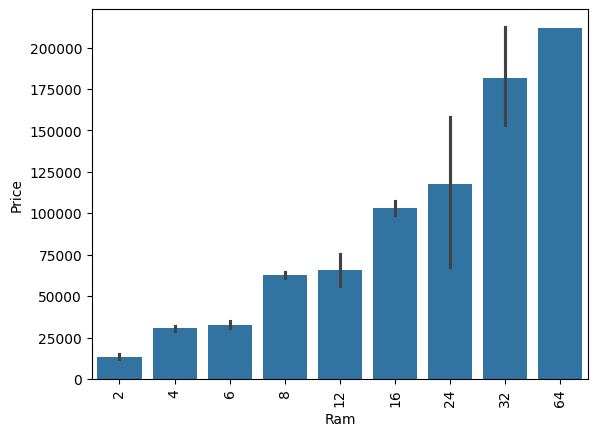

In [83]:
sns.barplot(x=df['Ram'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [84]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [85]:
# remove the substring ".0" from the values in the 'Memory' column of the DataFrame df.

df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex=True)

# regex=True: This parameter indicates that the pattern provided ('.0' in this case)
# should be treated as a regular expression.

In [86]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          224
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1TB Hybrid                         9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [87]:
# Replace GB with ''
df['Memory'] = df['Memory'].str.replace('GB','')

In [88]:
df['Memory'].value_counts()

256 SSD                        412
1TB HDD                        224
500 HDD                        132
512 SSD                        118
128 SSD +  1TB HDD              94
128 SSD                         76
256 SSD +  1TB HDD              73
32 Flash Storage                38
2TB HDD                         16
64 Flash Storage                15
512 SSD +  1TB HDD              14
1TB SSD                         14
256 SSD +  2TB HDD              10
1TB Hybrid                       9
256 Flash Storage                8
16 Flash Storage                 7
32 SSD                           6
180 SSD                          5
128 Flash Storage                4
512 SSD +  2TB HDD               3
16 SSD                           3
512 Flash Storage                2
1TB SSD +  1TB HDD               2
256 SSD +  500 HDD               2
128 SSD +  2TB HDD               2
256 SSD +  256 SSD               2
512 SSD +  256 SSD               1
512 SSD +  512 SSD               1
64 Flash Storage +  

In [89]:
# Replace 'TB'with '000'

df['Memory']= df['Memory'].str.replace('TB', '000')
df['Memory'].value_counts()

256 SSD                         412
1000 HDD                        224
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 38
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
1000 Hybrid                       9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD          

In [90]:
# split each string value based on the '+' character.

new = df['Memory'].str.split('+', n=1, expand=True)
new
# n=1 parameter specifies that the splitting should occur only once, so the method splits each string into two parts:
# the part before the first '+' character and the part after it.

# The expand = True parameter specifies that the split results should be returned as a DataFrame
# with each part in a separate column.

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [91]:
new.value_counts()

0                  1            
128 SSD              1000 HDD       94
256 SSD              1000 HDD       73
512 SSD              1000 HDD       14
256 SSD              2000 HDD       10
512 SSD              2000 HDD        3
1000 SSD             1000 HDD        2
128 SSD              2000 HDD        2
256 SSD              256 SSD         2
                     500 HDD         2
1000 HDD             1000 HDD        1
256 SSD              1000 Hybrid     1
512 SSD              1000 Hybrid     1
                     256 SSD         1
                     512 SSD         1
64 Flash Storage     1000 HDD        1
dtype: int64

In [92]:
df['first']= new[0]

In [93]:
# str.strip() method to remove leading and trailing whitespaces from each string value in the 'first'
# column of the DataFrame df

df['first']= df['first'].str.strip()
df['first']


0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1298              128 SSD
1299              512 SSD
1300     64 Flash Storage
1301             1000 HDD
1302              500 HDD
Name: first, Length: 1303, dtype: object

In [94]:
df['first'].value_counts()

256 SSD              500
1000 HDD             225
128 SSD              172
512 SSD              138
500 HDD              132
32 Flash Storage      38
64 Flash Storage      16
2000 HDD              16
1000 SSD              16
1000 Hybrid            9
256 Flash Storage      8
16 Flash Storage       7
32 SSD                 6
180 SSD                5
128 Flash Storage      4
16 SSD                 3
512 Flash Storage      2
240 SSD                1
8 SSD                  1
64 SSD                 1
128 HDD                1
32 HDD                 1
508 Hybrid             1
Name: first, dtype: int64

In [95]:
df['second']= new[1]
df['second']

0       None
1       None
2       None
3       None
4       None
        ... 
1298    None
1299    None
1300    None
1301    None
1302    None
Name: second, Length: 1303, dtype: object

In [96]:
df['second'].value_counts()

  1000 HDD       185
  2000 HDD        15
  256 SSD          3
  500 HDD          2
  1000 Hybrid      2
  512 SSD          1
Name: second, dtype: int64

In [97]:
df['Layer1HDD']=df['first'].apply(lambda x:1 if 'HDD' in x else 0)
df['Layer1HDD'].value_counts()


0    928
1    375
Name: Layer1HDD, dtype: int64

In [98]:
df['Layer1SSD']=df['first'].apply(lambda x:1 if 'SSD' in x else 0)
df['Layer1SSD'].value_counts()

1    843
0    460
Name: Layer1SSD, dtype: int64

In [99]:
df['Layer1Hybrid']=df['first'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['Layer1Hybrid'].value_counts()

0    1293
1      10
Name: Layer1Hybrid, dtype: int64

In [100]:
df['Layer1Flash_Storage'] = df['first'].apply(lambda x: 1 if "Flash Storage" in x else 0)
df['Layer1Flash_Storage'].value_counts()

0    1228
1      75
Name: Layer1Flash_Storage, dtype: int64

In [101]:
df['first'].value_counts()

256 SSD              500
1000 HDD             225
128 SSD              172
512 SSD              138
500 HDD              132
32 Flash Storage      38
64 Flash Storage      16
2000 HDD              16
1000 SSD              16
1000 Hybrid            9
256 Flash Storage      8
16 Flash Storage       7
32 SSD                 6
180 SSD                5
128 Flash Storage      4
16 SSD                 3
512 Flash Storage      2
240 SSD                1
8 SSD                  1
64 SSD                 1
128 HDD                1
32 HDD                 1
508 Hybrid             1
Name: first, dtype: int64

In [102]:
df['first'] = df['first'].str.replace(r'\D','')
df['first'].value_counts()

# .str.replace(r'\D',''): This applies the str.replace() method to each string value in the 'first' column.
# The r'\D' regex pattern matches any non-digit character in a string (i.e., any character that is not a digit).

# The second argument '' specifies that these non-digit characters should be replaced with an empty string.

256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
240       1
8         1
508       1
Name: first, dtype: int64

In [103]:
df['second'].value_counts()

  1000 HDD       185
  2000 HDD        15
  256 SSD          3
  500 HDD          2
  1000 Hybrid      2
  512 SSD          1
Name: second, dtype: int64

In [104]:
df['second'].isna().sum()

1095

In [105]:
df['second'].fillna('0', inplace=True)

In [106]:
df['second'].value_counts()

0                1095
  1000 HDD        185
  2000 HDD         15
  256 SSD           3
  500 HDD           2
  1000 Hybrid       2
  512 SSD           1
Name: second, dtype: int64

In [107]:
df['Layer2SSD']=df['second'].apply(lambda x:1 if 'SSD' in x else 0)
df['Layer2SSD'].value_counts()

0    1299
1       4
Name: Layer2SSD, dtype: int64

In [108]:
df['Layer2HDD']=df['second'].apply(lambda x:1 if 'HDD' in x else 0)
df['Layer2HDD'].value_counts()

0    1101
1     202
Name: Layer2HDD, dtype: int64

In [109]:
df['Layer2Hybrid']=df['second'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['Layer2Hybrid'].value_counts()

0    1301
1       2
Name: Layer2Hybrid, dtype: int64

In [110]:
df['Layer2Flash_Storage']=df['second'].apply(lambda x:1 if 'Flash Storage' in x else 0)
df['Layer2Flash_Storage'].value_counts()

0    1303
Name: Layer2Flash_Storage, dtype: int64

In [111]:
df['second'] = df['second'].str.replace(r'\D','')
df['second'].value_counts()

0       1095
1000     187
2000      15
256        3
500        2
512        1
Name: second, dtype: int64

In [112]:
print(df['first'].dtype)
print(df['second'].dtype)

object
object


In [113]:
df['first'] = df['first'].astype(int)
df['second'] = df['second'].astype(int)

In [114]:
print(df['first'].dtype)
print(df['second'].dtype)

int64
int64


In [115]:
df['first']

0        128
1        128
2        256
3        512
4        256
        ... 
1298     128
1299     512
1300      64
1301    1000
1302     500
Name: first, Length: 1303, dtype: int64

In [116]:
df['Layer1HDD']

0       0
1       0
2       0
3       0
4       0
       ..
1298    0
1299    0
1300    0
1301    1
1302    1
Name: Layer1HDD, Length: 1303, dtype: int64

In [117]:
df['second']

0       0
1       0
2       0
3       0
4       0
       ..
1298    0
1299    0
1300    0
1301    0
1302    0
Name: second, Length: 1303, dtype: int64

In [118]:
df['Layer2HDD']

0       0
1       0
2       0
3       0
4       0
       ..
1298    0
1299    0
1300    0
1301    0
1302    0
Name: Layer2HDD, Length: 1303, dtype: int64

In [119]:
df['HDD']= df['first']*df['Layer1HDD'] + df['second']*df['Layer2HDD']
df['HDD']

0          0
1          0
2          0
3          0
4          0
        ... 
1298       0
1299       0
1300       0
1301    1000
1302     500
Name: HDD, Length: 1303, dtype: int64

In [120]:
df['SSD']= df['first']*df['Layer1SSD'] + df['second']*df['Layer2SSD']
df['SSD']

0       128
1         0
2       256
3       512
4       256
       ... 
1298    128
1299    512
1300      0
1301      0
1302      0
Name: SSD, Length: 1303, dtype: int64

In [121]:
df['Hybrid']= df['first']*df['Layer1Hybrid'] + df['second']*df['Layer2Hybrid']
df['Hybrid']

0       0
1       0
2       0
3       0
4       0
       ..
1298    0
1299    0
1300    0
1301    0
1302    0
Name: Hybrid, Length: 1303, dtype: int64

In [122]:


df['Flash_Storage']= df['first']*df['Layer1Flash_Storage'] + df['second']*df['Layer2Flash_Storage']
df['Flash_Storage']

0         0
1       128
2         0
3         0
4         0
       ... 
1298      0
1299      0
1300     64
1301      0
1302      0
Name: Flash_Storage, Length: 1303, dtype: int64

In [123]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price', 'TouchScreen', 'IPS', 'ppi', 'Cpu brand', 'first', 'second',
       'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage',
       'Layer2SSD', 'Layer2HDD', 'Layer2Hybrid', 'Layer2Flash_Storage', 'HDD',
       'SSD', 'Hybrid', 'Flash_Storage'],
      dtype='object')

In [124]:
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [125]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price', 'TouchScreen', 'IPS', 'ppi', 'Cpu brand', 'HDD', 'SSD',
       'Hybrid', 'Flash_Storage'],
      dtype='object')

In [126]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
248,HP,Notebook,4,500 HDD,Intel UHD Graphics 620,Windows 10,1.49,35964.0000,0,1,165.632118,Intel Core i5,500,0,0,0
552,Dell,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,143802.7200,0,1,127.335675,Intel Core i7,1000,256,0,0
1209,Asus,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,2.20,130482.7200,0,0,141.211998,Intel Core i7,1000,256,0,0
305,Lenovo,Notebook,4,1000 HDD,Intel HD Graphics 505,No OS,2.20,19180.2672,0,0,100.454670,Other Intel Processor,1000,0,0,0
1002,Dell,Notebook,4,128 SSD,Intel HD Graphics 620,Windows 10,2.18,29144.1600,0,0,100.454670,Intel Core i3,0,128,0,0


In [127]:
df.drop(columns=['Memory'], inplace=True)

In [128]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [129]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
IPS              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [130]:
df.drop(columns=['Hybrid','Flash_Storage'], inplace=True)

In [131]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [132]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [133]:
df['Gpu']

0       Intel Iris Plus Graphics 640
1             Intel HD Graphics 6000
2              Intel HD Graphics 620
3                 AMD Radeon Pro 455
4       Intel Iris Plus Graphics 650
                    ...             
1298           Intel HD Graphics 520
1299           Intel HD Graphics 520
1300               Intel HD Graphics
1301              AMD Radeon R5 M330
1302               Intel HD Graphics
Name: Gpu, Length: 1303, dtype: object

In [134]:
df['Gpu brand']= df['Gpu'].apply(lambda x:x.split()[0])
df['Gpu brand']

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: Gpu brand, Length: 1303, dtype: object

In [135]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [136]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [137]:
df =df[df['Gpu brand'] != 'ARM']
df

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel
1299,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel
1300,Lenovo,Notebook,2,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel
1301,HP,Notebook,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD


In [138]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

In [139]:
df['Gpu brand']

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: Gpu brand, Length: 1302, dtype: object

In [140]:
df['Price']

0        71378.6832
1        47895.5232
2        30636.0000
3       135195.3360
4        96095.8080
           ...     
1298     33992.6400
1299     79866.7200
1300     12201.1200
1301     40705.9200
1302     19660.3200
Name: Price, Length: 1302, dtype: float64

In [141]:
# Median value of ['Price'] for  'Intel' bar

df[df['Gpu brand'] == 'Intel']['Price'].median()

47978.64

In [142]:
medians = df.groupby(['Gpu brand'])['Price'].median()
medians

Gpu brand
AMD       36026.604
Intel     47978.640
Nvidia    66013.920
Name: Price, dtype: float64

In [143]:
df['Gpu brand'].unique()

array(['Intel', 'AMD', 'Nvidia'], dtype=object)

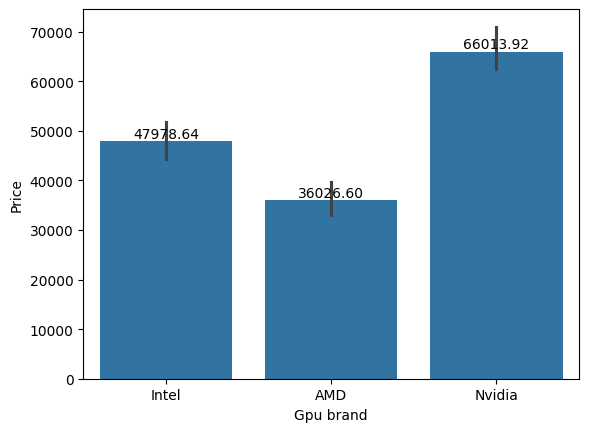

In [144]:
sns.barplot(x=df['Gpu brand'], y=df['Price'], estimator= np.median)

medians = df.groupby(['Gpu brand'])['Price'].median()
for i, brand in enumerate(df['Gpu brand'].unique()):
    median=medians.loc[brand]
    plt.text(i, median, f'{median:.2f}', ha='center', va='bottom', color='black')


# When you set estimator=np.median, it means that the median value of the data within each category
# will be used to determine the height of the bars.

In [145]:
"""# Example to check use of estimator

import seaborn as sns
import pandas as pd
import numpy as np

# Sample DataFrame
data = {
    'Gpu brand': ['Nvidia', 'AMD', 'Nvidia', 'AMD', 'Nvidia'],
    'Price': [500, 400, 600, 450, 550]
}
df = pd.DataFrame(data)

# Create bar plot
sns.barplot(x=df['Gpu brand'], y=df['Price'], estimator=np.median)

# Add labels and title
import matplotlib.pyplot as plt
plt.xlabel('GPU Brand')
plt.ylabel('Price')
plt.title('Median Price of GPUs by Brand')

# Show plot
plt.show()"""

"# Example to check use of estimator\n\nimport seaborn as sns\nimport pandas as pd\nimport numpy as np\n\n# Sample DataFrame\ndata = {\n    'Gpu brand': ['Nvidia', 'AMD', 'Nvidia', 'AMD', 'Nvidia'],\n    'Price': [500, 400, 600, 450, 550]\n}\ndf = pd.DataFrame(data)\n\n# Create bar plot\nsns.barplot(x=df['Gpu brand'], y=df['Price'], estimator=np.median)\n\n# Add labels and title\nimport matplotlib.pyplot as plt\nplt.xlabel('GPU Brand')\nplt.ylabel('Price')\nplt.title('Median Price of GPUs by Brand')\n\n# Show plot\nplt.show()"

In [146]:
df.drop(columns=['Gpu'],inplace=True)

In [147]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [148]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

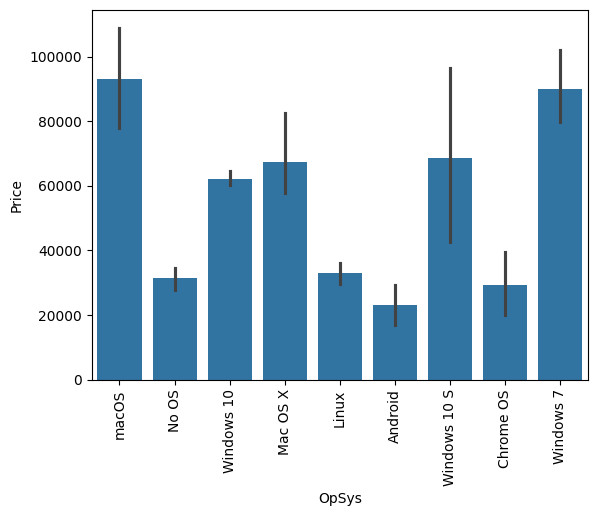

In [149]:
sns.barplot(x=df['OpSys'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [150]:
def cat_os(inp):
  if inp == 'Windows 10' or inp=='Windows 7' or inp== 'Windows 10 S':
    return 'Window'
  elif inp == 'macOS' or inp=='Mac OS X':
    return 'Mac'
  else:
    return 'Others/No OS/Linux'

In [151]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [152]:
df['os']=df['OpSys'].apply(cat_os)
df['os']

0                      Mac
1                      Mac
2       Others/No OS/Linux
3                      Mac
4                      Mac
               ...        
1298                Window
1299                Window
1300                Window
1301                Window
1302                Window
Name: os, Length: 1302, dtype: object

In [153]:
df['os'].value_counts()

Window                1125
Others/No OS/Linux     156
Mac                     21
Name: os, dtype: int64

In [154]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [155]:
df.drop(columns=['OpSys'], inplace=True)

In [156]:
df['os'].unique()

array(['Mac', 'Others/No OS/Linux', 'Window'], dtype=object)

<Axes: xlabel='os', ylabel='Price'>

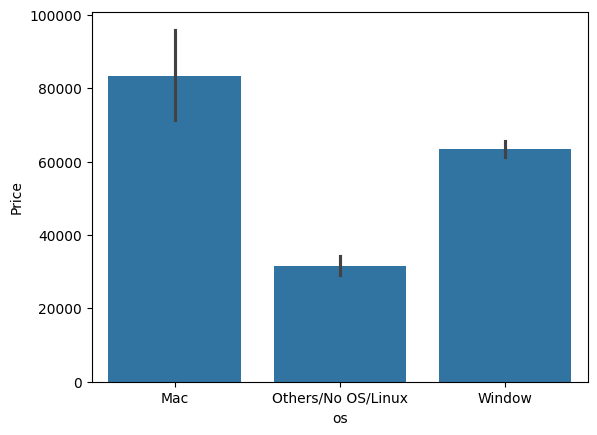

In [157]:
sns.barplot(x=df['os'], y=df['Price'])


<ipython-input-158-05ee4c8848be>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

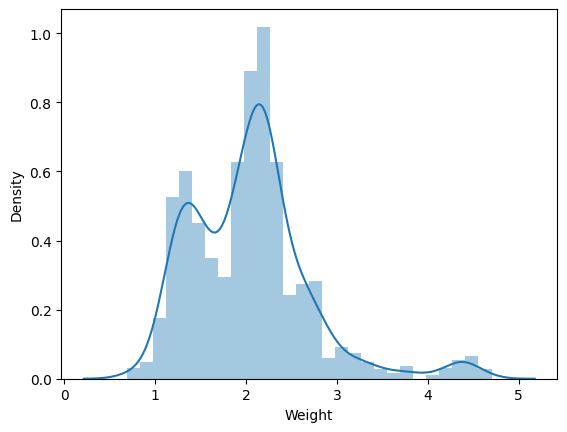

In [158]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

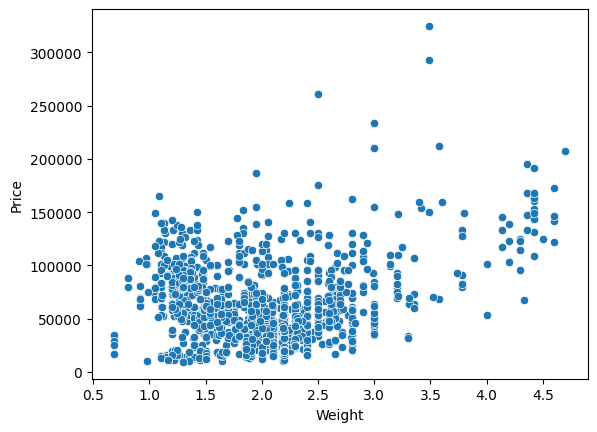

In [159]:
sns.scatterplot(x=df['Weight'], y=df['Price'])

In [160]:
df.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
TouchScreen    0.192917
IPS            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<Axes: >

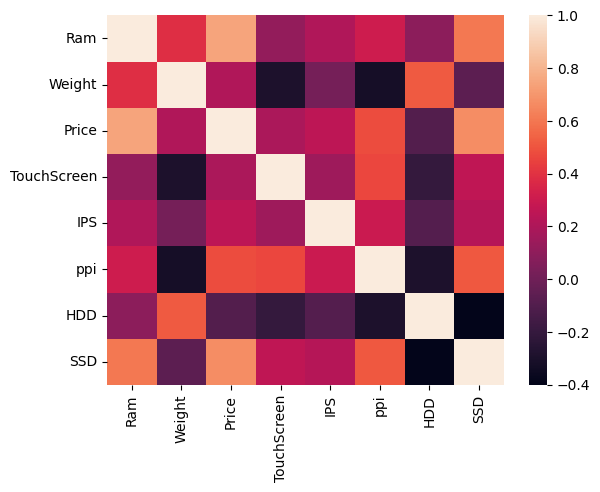

In [161]:
sns.heatmap(df.corr())

<ipython-input-162-c1a82a4801f0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

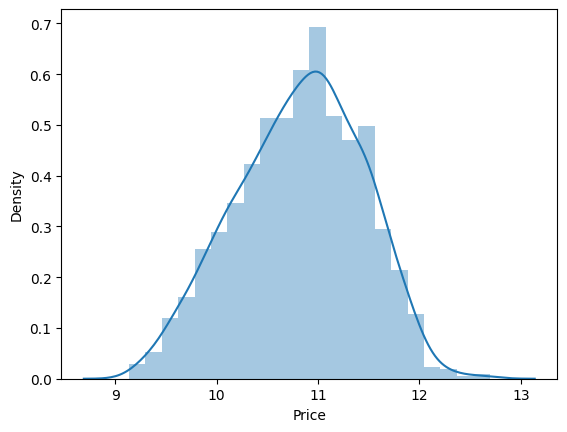

In [162]:
sns.distplot(np.log(df['Price']))

# **Outlier Treatment**

In [163]:
df.describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,95%,96%,97%,98%,99%,max
Ram,1302.0,8.385561,5.085166,2.000000,2.00000,4.00000,4.000000,4.00000,8.000000,16.000000,16.00000,16.00000,16.000000,32.000000,64.000000
Weight,1302.0,2.039416,0.665274,0.690000,0.97000,1.08020,1.100000,1.17000,2.040000,3.200000,3.35000,3.78000,4.298000,4.420000,4.700000
Price,1302.0,59889.058673,37251.183866,9270.720000,12201.12000,13747.30560,14811.323184,16463.52000,52107.840000,130472.064000,135134.70336,144474.58080,152848.076256,167777.851536,324954.720000
TouchScreen,1302.0,0.146697,0.353940,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000
IPS,1302.0,0.279570,0.448960,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000
ppi,1302.0,146.568497,43.069016,90.583402,100.45467,100.45467,100.454670,100.45467,141.211998,254.671349,276.05353,276.05353,282.423996,282.423996,352.465147
HDD,1302.0,414.101382,515.889348,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,1000.000000,1000.00000,1000.00000,2000.000000,2000.000000,2000.000000
SSD,1302.0,183.874040,186.969314,0.000000,0.00000,0.00000,0.000000,0.00000,256.000000,512.000000,512.00000,512.00000,512.000000,1000.000000,1024.000000


#### As we see there is minimul number of outliers so we are not clipping it

In [164]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


# Encoding Categorical Columns

In [165]:
df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [166]:
cat_cols = df.dtypes[df.dtypes=='object'].index
cat_cols

Index(['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os'], dtype='object')

In [167]:
num_cols = df.dtypes[df.dtypes!='object'].index
num_cols

Index(['Ram', 'Weight', 'Price', 'TouchScreen', 'IPS', 'ppi', 'HDD', 'SSD'], dtype='object')

In [168]:
# pd.get_dummies used to convert categorical variables in the DataFrame df into dummy/indicator variables.

df_dum = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print(df_dum.shape)

# drop_first=True: This parameter controls whether the first level of each categorical
# variable should be dropped to avoid multicollinearity. Setting it to True will drop the first level.

(1302, 39)


When you execute this code, pandas' get_dummies() function will create new binary columns for each unique category in the specified categorical columns (cat_cols). The values in these columns will be 1 if the original column contained that category and 0 otherwise.

In [169]:
print(df_dum.columns)

Index(['Ram', 'Weight', 'Price', 'TouchScreen', 'IPS', 'ppi', 'HDD', 'SSD',
       'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell',
       'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei',
       'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
       'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'TypeName_Gaming',
       'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook',
       'TypeName_Workstation', 'Cpu brand_Intel Core i3',
       'Cpu brand_Intel Core i5', 'Cpu brand_Intel Core i7',
       'Cpu brand_Other Intel Processor', 'Gpu brand_Intel',
       'Gpu brand_Nvidia', 'os_Others/No OS/Linux', 'os_Window'],
      dtype='object')


In [170]:
df_dum.head()

,Ram,Weight,Price,TouchScreen,IPS,ppi,HDD,SSD,Company_Apple,Company_Asus,...,TypeName_Ultrabook,TypeName_Workstation,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia,os_Others/No OS/Linux,os_Window
0,8,1.37,71378.6832,0,1,226.983005,0,128,1,0,...,1,0,0,1,0,0,1,0,0,0
1,8,1.34,47895.5232,0,0,127.677940,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0
2,8,1.86,30636.0000,0,0,141.211998,0,256,0,0,...,0,0,0,1,0,0,1,0,1,0
3,16,1.83,135195.3360,0,1,220.534624,0,512,1,0,...,1,0,0,0,1,0,0,0,0,0
4,8,1.37,96095.8080,0,1,226.983005,0,256,1,0,...,1,0,0,1,0,0,1,0,0,0


In [171]:
x = df_dum.drop('Price', axis=1)
y = np.log(df_dum['Price'])
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(1302, 38)
(1302,)


Taking the natural logarithm of a variable is a common transformation used in data analysis and modeling. It can be useful when the data is skewed or has a wide range of values. By applying the logarithm, you can often make the data more symmetric and easier to interpret. This transformation is particularly common when dealing with skewed distributions or when modeling with linear regression, where the assumptions of normality and constant variance of errors are important.

# **Split data into Train and test**

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=8)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1041, 38)
(261, 38)
(1041,)
(261,)


# **Linear Regression**

In [174]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [175]:
def eval_model(ytest,ypred):
  mae = mean_absolute_error(ytest,ypred)
  mse = mean_squared_error(ytest,ypred)
  rmse = mean_squared_error(ytest,ypred,squared=False)
  r2s = r2_score(ytest,ypred)
  return {'MAE':mae, 'MSE':mse, 'RMSE': rmse}

def model_res(model,x_train,x_test,y_train,y_test,ypred,mname):
  train_r2 = model.score(x_train,y_train)
  test_r2 = model.score(x_test, y_test)
  w = eval_model(y_test,ypred)
  res_metrics = {'Train_R2': train_r2, 'Test_R2':test_r2, 'Test_MSE': w['MSE'],
                 'Test_RMSE':w['RMSE'],'Test_MAE':w['MSE']
                }
  res = pd.DataFrame(res_metrics, index=[mname])
  return res, res_metrics

In [176]:
from sklearn.linear_model import LinearRegression

In [177]:
lr1 = LinearRegression()
lr1.fit(x_train,y_train)

LinearRegression()

In [178]:
ypred_lr1 = lr1.predict(x_test)

In [179]:
lr1_df, lr_res = model_res(lr1,x_train,x_test,y_train,y_test,ypred_lr1,'LinReg')
lr1_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
LinReg,0.832685,0.81543,0.075368,0.274531,0.075368


# **Decision Tree Regressor**

In [180]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [181]:
dt = DecisionTreeRegressor(max_depth=8, min_samples_split=10, min_samples_leaf=10)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=10, min_samples_split=10)

In [182]:
ypred_dt = dt.predict(x_test)

In [183]:
dt_df, dt_res = model_res(dt,x_train,x_test, y_train, y_test,ypred_dt,'DTree_Reg')
dt_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
DTree_Reg,0.868534,0.826653,0.070785,0.266054,0.070785


# **Random Forest Regressor**

In [184]:
rf = RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_split=12)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=12, n_estimators=300)

In [185]:
ypred_rf= rf.predict(x_test)

In [186]:
rf_df,rf_res = model_res(rf, x_train,x_test,y_train,y_test, ypred_rf,'RF_Reg')
rf_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
RF_Reg,0.926308,0.875362,0.050895,0.225599,0.050895


In [187]:
rf2 = RandomForestRegressor(n_estimators=300, max_depth=9, min_samples_split=4)
rf2.fit(x_train, y_train)

RandomForestRegressor(max_depth=9, min_samples_split=4, n_estimators=300)

In [188]:
ypred_rf1 = rf.predict(x_test)

In [189]:
rf_df1, rf_res1 = model_res(rf2, x_train,x_test,y_train,y_test,ypred_rf1,'RF_Reg1')
rf_df1

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
RF_Reg1,0.938678,0.877459,0.050895,0.225599,0.050895


# **AdaBoost Regressor**

In [190]:
ada = AdaBoostRegressor(n_estimators=200, random_state=8)
ada.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=200, random_state=8)

In [191]:
ypred_ada =ada.predict(x_test)
ypred_ada

array([10.60104803, 10.44301468, 10.19034599, 10.19034599, 10.7395618 ,
       11.57440456, 10.8423433 , 11.44550187, 11.14483652, 10.68512737,
       11.53693476, 11.34262499, 10.19034599, 10.68512737, 10.5782122 ,
       10.89154525, 11.61059052, 11.53693476, 10.55140464, 11.14465774,
       11.15045174, 10.9642943 , 10.30052826, 10.30052826, 10.74821117,
       10.19034599, 11.1743636 , 11.06775112, 11.26974953, 10.0167925 ,
       10.95796026, 10.31518005, 10.07151244, 11.26974953, 11.14465774,
       10.29852754, 10.83873753,  9.78956746, 11.44550187, 10.07151244,
       11.14483652, 10.58414801, 11.38734907, 10.66149833, 11.44550187,
       11.38734907, 11.14465774, 10.74821117, 11.06775112, 10.9642943 ,
       10.66631957,  9.86520491, 10.19034599, 11.38861378, 11.1095217 ,
       11.26974953, 10.73395336, 10.44301468, 10.12925203, 11.15045174,
       11.26974953, 10.66149833, 11.20313436, 10.19034599, 11.53693476,
       11.68755934, 10.29852754, 10.34021293, 10.19034599, 10.19

In [192]:
ada_df, ada_res = model_res(ada, x_train,x_test,y_train,y_test,ypred_ada,'AdaBoost_Reg')
ada_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
AdaBoost_Reg,0.819083,0.804794,0.079711,0.282331,0.079711


# **XGBoost Regressor**

In [193]:
from xgboost import XGBRegressor

In [194]:
xgb1 = XGBRegressor()

In [195]:
xgb1.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [196]:
ypred_xgb1 = xgb1.predict(x_test)

In [197]:
ypred_xgb1.dtype

dtype('float32')

In [198]:
xgb_df, xgb_res = model_res(xgb1, x_train,x_test,y_train,y_test,ypred_xgb1,'XGBoost_Reg')
xgb_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
XGBoost_Reg,0.988499,0.896291,0.042348,0.205787,0.042348


# **Concating the result**

In [199]:
all_res = pd.concat([lr1_df,dt_df,rf_df,ada_df, xgb_df, rf_df1])
all_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
LinReg,0.832685,0.815430,0.075368,0.274531,0.075368
DTree_Reg,0.868534,0.826653,0.070785,0.266054,0.070785
RF_Reg,0.926308,0.875362,0.050895,0.225599,0.050895
AdaBoost_Reg,0.819083,0.804794,0.079711,0.282331,0.079711
XGBoost_Reg,0.988499,0.896291,0.042348,0.205787,0.042348
RF_Reg1,0.938678,0.877459,0.050895,0.225599,0.050895


# **Applying Hyperparameter Tuning For Random Forest**

In [200]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [201]:
params_rf = {'n_estimators':[200,220,240,260,280,300,320,350,400,450,500],
             'max_depth':[9,10,11,12],
             'min_samples_split':[2,3,4,5]
             }

In [205]:
rf_base = RandomForestRegressor(random_state=42)
rs_rf1 = GridSearchCV(estimator=rf_base, param_grid= params_rf, scoring='r2', cv=5)
rs_rf1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [9, 10, 11, 12],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [200, 220, 240, 260, 280, 300, 320,
                                          350, 400, 450, 500]},
             scoring='r2')

In [204]:
rf_base

RandomForestRegressor(random_state=42)

In [207]:
print(rs_rf1.best_estimator_)
print(rs_rf1.best_params_)
print(rs_rf1.best_score_)

RandomForestRegressor(max_depth=12, n_estimators=300, random_state=42)
{'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 300}
0.8710015012042819


In [208]:
rf2 = RandomForestRegressor(**rs_rf1.best_params_)
rf2.fit(x_train,y_train)

RandomForestRegressor(max_depth=12, n_estimators=300)

In [209]:
ypred_rf2 = rf.predict(x_test)

In [210]:
rf_df2, rf_res2 = model_res(rf2, x_train,x_test,y_train,y_test,ypred_rf1,'RF_Reg2')
rf_df2

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
RF_Reg2,0.96663,0.887925,0.050895,0.225599,0.050895


In [211]:
all_res =pd.concat([lr1_df,dt_df,rf_df,ada_df,xgb_df,rf_df1,rf_df2])
all_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
LinReg,0.832685,0.815430,0.075368,0.274531,0.075368
DTree_Reg,0.868534,0.826653,0.070785,0.266054,0.070785
RF_Reg,0.926308,0.875362,0.050895,0.225599,0.050895
AdaBoost_Reg,0.819083,0.804794,0.079711,0.282331,0.079711
XGBoost_Reg,0.988499,0.896291,0.042348,0.205787,0.042348
RF_Reg1,0.938678,0.877459,0.050895,0.225599,0.050895
RF_Reg2,0.966630,0.887925,0.050895,0.225599,0.050895


In [212]:
actual_ypred_rf1 = ypred_rf1

res_df = pd.DataFrame({'Actual_y_test': y_test, 'Pred':actual_ypred_rf1})
res_df.sample(20)

,Actual_y_test,Pred
238,12.241725,11.983690
654,9.875184,9.963858
898,10.395556,10.205277
300,10.208009,10.822414
864,11.689792,11.557081
1107,10.740600,10.737434
169,10.600953,10.665502
749,12.362418,11.412094
1224,10.208009,10.240254
346,9.606773,9.514154


### This is how we use Machine Learning Algorithm for doing laptop price prediction